In [1]:

from azureml import Workspace
import numpy as np
import pandas as pd
import math

import matplotlib.pylab as plt
import seaborn as sns

from datetime import datetime as dt

#adjust to each CCY
ws = Workspace()
ds = ws.datasets['USDMXN Spot Pull.csv']
df = ds.to_dataframe()

#adjust to each CCY
ds2 = ws.datasets['USDMXN Prev Day Data.csv']
df2 = ds2.to_dataframe()

data = pd.DataFrame(data = df)

PrevData = pd.DataFrame(data = df2)

data = data.dropna()
data.reset_index(drop=True, inplace=True)

data['Dates'] = pd.to_datetime(data['Dates'])

data['Day Start'] = np.where(data['Dates'].dt.minute == 0, np.where(data['Dates'].dt.hour == 0,data['Open'],""),"")

#USDCAD 1Y vol, set for each different CCY
Vol1Y = 10.54

#defining trend we are looking for as 1/3 of the implied daily volatility
ccy_trend = ((Vol1Y/(math.sqrt(252)))/3)/100

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ccy_trend

0.002213191969731808

In [2]:


data['Current Trend'] = ""
trends = pd.DataFrame()
    
data['PrevDate'] = data['Dates'].dt.date
 
data = data[['PrevDate','Dates','Open','Close','High','Low','Day Start', 'Current Trend']]
data

,PrevDate,Dates,Open,Close,High,Low,Day Start,Current Trend
0,2019-05-15,2019-05-15 00:00:00,19.1674,19.1672,19.1674,19.1671,19.1674,
1,2019-05-15,2019-05-15 00:01:00,19.1672,19.1676,19.1676,19.1671,,
2,2019-05-15,2019-05-15 00:02:00,19.1676,19.1678,19.1678,19.1673,,
3,2019-05-15,2019-05-15 00:03:00,19.1678,19.1673,19.1678,19.1673,,
4,2019-05-15,2019-05-15 00:04:00,19.1673,19.1673,19.1674,19.1673,,
5,2019-05-15,2019-05-15 00:05:00,19.1673,19.1675,19.1675,19.1673,,
6,2019-05-15,2019-05-15 00:06:00,19.1675,19.1670,19.1675,19.1650,,
7,2019-05-15,2019-05-15 00:07:00,19.1670,19.1677,19.1678,19.1670,,
8,2019-05-15,2019-05-15 00:08:00,19.1678,19.1681,19.1682,19.1677,,
9,2019-05-15,2019-05-15 00:09:00,19.1681,19.1674,19.1682,19.1672,,


In [42]:
ccy_trend

0.002213191969731808

In [3]:
PrevData = PrevData.rename(columns={"Dates": "PrevDate"})
PrevData['PrevDate'] = pd.to_datetime(PrevData['PrevDate'])
PrevData

,PrevDate,USDMXN25RON Previous Day Px,USDMXN25RON MOV_AVG_10D,DXY Previous Day 5d % Change,SPX Index Previous Day 5d % Change,USDMXNV1M Open,USDMXNV1Y Open,SPX Open,DXY Open
0,2019-05-16,1.1250,0.7945,-0.06,-0.99,9.480,10.913,2855.80,97.543
1,2019-05-17,1.0175,0.8383,0.50,0.20,9.350,11.070,2858.60,97.832
2,2019-05-20,0.8500,0.8765,0.68,-0.76,9.653,11.165,2841.94,97.959
3,2019-05-21,1.1075,0.9293,0.63,1.01,9.638,11.115,2854.02,97.915
4,2019-05-22,1.0375,0.9710,0.55,1.06,8.862,10.960,2856.06,98.014
5,2019-05-23,0.9950,0.9945,0.48,0.19,8.762,10.875,2836.70,98.066
6,2019-05-24,0.8575,0.9873,0.00,-1.88,8.913,10.985,2832.41,97.833
7,2019-05-27,0.5800,0.9705,-0.39,-1.17,9.070,11.140,2830.03,97.568
8,2019-05-28,0.8475,0.9503,-0.33,-1.33,9.273,11.177,2830.03,97.739
9,2019-05-29,0.8400,0.9258,-0.11,-1.33,9.273,11.300,2790.25,97.923


In [4]:
data = data.set_index('PrevDate').join(PrevData.set_index('PrevDate'))

data.describe()

,Open,Close,High,Low,USDMXN25RON Previous Day Px,USDMXN25RON MOV_AVG_10D,DXY Previous Day 5d % Change,SPX Index Previous Day 5d % Change,USDMXNV1M Open,USDMXNV1Y Open,SPX Open,DXY Open
count,172654.000000,172654.000000,172654.000000,172654.000000,164979.000000,164979.000000,164979.000000,164979.000000,164979.000000,164979.000000,164979.000000,164979.000000
mean,19.348255,19.348259,19.349780,19.346728,0.691851,0.701616,0.025361,0.346925,9.753881,11.413167,2957.926619,97.826527
std,0.292482,0.292483,0.292705,0.292262,0.219727,0.171388,0.616557,1.677171,1.100240,0.379494,82.616887,0.719628
min,18.864800,18.864800,18.867600,18.864400,0.280000,0.479000,-1.620000,-5.830000,8.235000,10.558000,2751.530000,95.995000
25%,19.113700,19.113700,19.114800,19.112500,0.525000,0.543300,-0.410000,-0.760000,9.070000,11.097000,2903.270000,97.338000
50%,19.236700,19.236700,19.238500,19.235100,0.642500,0.624300,0.030000,0.560000,9.390000,11.490000,2968.350000,97.915000
75%,19.564500,19.564500,19.566100,19.562800,0.840000,0.876500,0.500000,1.370000,10.245000,11.660000,3007.660000,98.337000
max,20.257800,20.257900,20.258000,20.244900,1.265000,0.994500,1.310000,5.180000,13.663000,12.313000,3134.850000,99.395000


In [6]:
data = data.reset_index()

data

,PrevDate,Dates,Open,Close,High,Low,Day Start,Current Trend,USDMXN25RON Previous Day Px,USDMXN25RON MOV_AVG_10D,DXY Previous Day 5d % Change,SPX Index Previous Day 5d % Change,USDMXNV1M Open,USDMXNV1Y Open,SPX Open,DXY Open
0,2019-05-15,2019-05-15 00:00:00,19.1674,19.1672,19.1674,19.1671,19.1674,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-15,2019-05-15 00:01:00,19.1672,19.1676,19.1676,19.1671,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-15,2019-05-15 00:02:00,19.1676,19.1678,19.1678,19.1673,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-15,2019-05-15 00:03:00,19.1678,19.1673,19.1678,19.1673,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-15,2019-05-15 00:04:00,19.1673,19.1673,19.1674,19.1673,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-05-15,2019-05-15 00:05:00,19.1673,19.1675,19.1675,19.1673,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-05-15,2019-05-15 00:06:00,19.1675,19.1670,19.1675,19.1650,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-05-15,2019-05-15 00:07:00,19.1670,19.1677,19.1678,19.1670,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-05-15,2019-05-15 00:08:00,19.1678,19.1681,19.1682,19.1677,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-05-15,2019-05-15 00:09:00,19.1681,19.1674,19.1682,19.1672,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
  
for i in range(len(USDCAD)):
    if (USDCAD.loc[i,'Day Start'] != ""):
        trend_start = float(USDCAD.loc[i,'Day Start'])
        daily_trend = 0
        trend_instance = ""
        USDCAD.loc[i,'Current Trend'] = ((USDCAD.loc[i,'Close']) - trend_start)/trend_start
        
    else:

        USDCAD.loc[i,'Current Trend'] = ((USDCAD.loc[i,'Close']) - trend_start)/trend_start
        if abs(USDCAD.loc[i,'Current Trend']) > USDCAD_trend and trend_instance =="":
            trend_instance = 1
            daily_trend = daily_trend + 1
            trend_start_time = USDCAD.loc[i,'Dates']
                    
            if (USDCAD.loc[i,'Close'] - trend_start) > 0:
                trend_type = "Up"
                trend_extreme = float(USDCAD.loc[i,'High'])
                max_trend_size = (trend_extreme - trend_start)/trend_start
            else:
                trend_type = "Down"
                trend_extreme = float(USDCAD.loc[i,'Low'])
                max_trend_size = (trend_extreme - trend_start)/trend_start
            
        elif trend_instance !="" and abs(USDCAD.loc[i,'Current Trend']) > abs(max_trend_size * .68):
            if abs(USDCAD.loc[i,'Current Trend']) > abs(max_trend_size):
                trend_instance = trend_instance + 1
                if (USDCAD.loc[i,'Close'] - trend_start) > 0:
                    trend_extreme = float(USDCAD.loc[i,'High'])
                    max_trend_size = (trend_extreme - trend_start)/trend_start
                else:
                    trend_extreme = float(USDCAD.loc[i,'Low'])
                    max_trend_size = (trend_extreme - trend_start)/trend_start
            else:
                trend_instance = trend_instance + 1
                    
        elif trend_instance != "" and abs(USDCAD.loc[i,'Current Trend']) < abs(max_trend_size * .68):
            
            trend_end_time = USDCAD.loc[i,'Dates']
            prev_RR = USDCAD.loc[i,'USDCAD25RON Previous Day Px']
            prev_RR_MAVG = USDCAD.loc[i,'USDCAD25RON MOV_AVG_10D']
            prev_DXY_trend = USDCAD.loc[i,'DXY Previous Day 5d % Change']
            prev_SPY_trend = USDCAD.loc[i,'SPX Index Previous Day 5d % Change']
            Vol_1M_Open = USDCAD.loc[i,'USDCADV1M Open']
            Vol_1Y_Open = USDCAD.loc[i,'USDCADV1Y Open']
            SPX_Open = USDCAD.loc[i,'SPX Open']
            DXY_Open = USDCAD.loc[i,'DXY Open']
            
            record = {'CCY' : 'USDCAD', 'Trend Start Time' : trend_start_time, 'Trend End Time' : trend_end_time,
                        'Max Trend Size' : max_trend_size, 'Trend Type' : trend_type, 'Daily Trend #' : daily_trend,
                      'Trend Start' : trend_start, 'Trend Extreme' : trend_extreme, 'Previous Day RR' : prev_RR, 
                      'Previous Day RR MAVG' : prev_RR_MAVG, 'Previous Day DXY Trend' : prev_DXY_trend, 
                      'Previous Day SPY Trend' : prev_SPY_trend, 'USDCADV1M Open' : Vol_1M_Open, 'USDCADV1Y Open' : Vol_1Y_Open,
                     'SPX Open' : SPX_Open, 'DXY Open' : DXY_Open}
            trends = trends.append(record, ignore_index=True)
            trend_instance = ""
            trend_start = trend_extreme
        
                

                    
     

In [7]:
def trend_check(CCY, ccy_trend,ccy_name):
    trends = pd.DataFrame()
    for i in range(len(CCY)):
        if (CCY.loc[i,'Day Start'] != ""):
            trend_start = float(CCY.loc[i,'Day Start'])
            daily_trend = 0
            trend_instance = ""
            CCY.loc[i,'Current Trend'] = ((CCY.loc[i,'Close']) - trend_start)/trend_start

        else:

            CCY.loc[i,'Current Trend'] = ((CCY.loc[i,'Close']) - trend_start)/trend_start
            if abs(CCY.loc[i,'Current Trend']) > ccy_trend and trend_instance =="":
                trend_instance = 1
                daily_trend = daily_trend + 1
                trend_start_time = CCY.loc[i,'Dates']

                if (CCY.loc[i,'Close'] - trend_start) > 0:
                    trend_type = "Up"
                    trend_extreme = float(CCY.loc[i,'High'])
                    max_trend_size = (trend_extreme - trend_start)/trend_start
                else:
                    trend_type = "Down"
                    trend_extreme = float(CCY.loc[i,'Low'])
                    max_trend_size = (trend_extreme - trend_start)/trend_start

            elif trend_instance !="" and abs(CCY.loc[i,'Current Trend']) > abs(max_trend_size * .68):
                if abs(CCY.loc[i,'Current Trend']) > abs(max_trend_size):
                    trend_instance = trend_instance + 1
                    if (CCY.loc[i,'Close'] - trend_start) > 0:
                        trend_extreme = float(CCY.loc[i,'High'])
                        max_trend_size = (trend_extreme - trend_start)/trend_start
                    else:
                        trend_extreme = float(CCY.loc[i,'Low'])
                        max_trend_size = (trend_extreme - trend_start)/trend_start
                else:
                    trend_instance = trend_instance + 1

            elif trend_instance != "" and abs(CCY.loc[i,'Current Trend']) < abs(max_trend_size * .68):

                trend_end_time = CCY.loc[i,'Dates']
                prev_RR = CCY.loc[i,'USDMXN25RON Previous Day Px']
                prev_RR_MAVG = CCY.loc[i,'USDMXN25RON MOV_AVG_10D']
                prev_DXY_trend = CCY.loc[i,'DXY Previous Day 5d % Change']
                prev_SPY_trend = CCY.loc[i,'SPX Index Previous Day 5d % Change']
                Vol_1M_Open = CCY.loc[i,'USDMXNV1M Open']
                Vol_1Y_Open = CCY.loc[i,'USDMXNV1Y Open']
                SPX_Open = CCY.loc[i,'SPX Open']
                DXY_Open = CCY.loc[i,'DXY Open']

                record = {'CCY' : ccy_name, 'Trend Start Time' : trend_start_time, 'Trend End Time' : trend_end_time,
                            'Max Trend Size' : max_trend_size, 'Trend Type' : trend_type, 'Daily Trend #' : daily_trend,
                          'Trend Start' : trend_start, 'Trend Extreme' : trend_extreme, 'Previous Day RR' : prev_RR, 
                          'Previous Day RR MAVG' : prev_RR_MAVG, 'Previous Day DXY Trend' : prev_DXY_trend, 
                          'Previous Day SPY Trend' : prev_SPY_trend, '1M Vol Open' : Vol_1M_Open, '1Y Vol Open' : Vol_1Y_Open,
                         'SPX Open' : SPX_Open, 'DXY Open' : DXY_Open}
                trends = trends.append(record, ignore_index=True)
                trend_instance = ""
                trend_start = trend_extreme
    return(trends)

In [8]:
trend_results = trend_check(data,ccy_trend,'USDMXN')

In [9]:
#test = trends.sort_values(by = ['Max Trend Size'])
trend_results

,1M Vol Open,1Y Vol Open,CCY,DXY Open,Daily Trend #,Max Trend Size,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,SPX Open,Trend End Time,Trend Extreme,Trend Start,Trend Start Time,Trend Type
0,NaN,NaN,USDMXN,NaN,1.0,0.002463,NaN,NaN,NaN,NaN,NaN,2019-05-15 08:16:00,19.2146,19.1674,2019-05-15 07:55:00,Up
1,NaN,NaN,USDMXN,NaN,2.0,-0.002332,NaN,NaN,NaN,NaN,NaN,2019-05-15 10:16:00,19.1698,19.2146,2019-05-15 10:13:00,Down
2,NaN,NaN,USDMXN,NaN,3.0,-0.008153,NaN,NaN,NaN,NaN,NaN,2019-05-15 19:50:00,19.0135,19.1698,2019-05-15 11:24:00,Down
3,9.480,10.913,USDMXN,97.543,1.0,-0.004861,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 07:23:00,18.9787,19.0714,2019-05-16 04:23:00,Down
4,9.480,10.913,USDMXN,97.543,2.0,0.002424,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 07:57:00,19.0247,18.9787,2019-05-16 07:41:00,Up
5,9.480,10.913,USDMXN,97.543,3.0,0.002344,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 08:56:00,19.0693,19.0247,2019-05-16 08:49:00,Up
6,9.480,10.913,USDMXN,97.543,4.0,0.003398,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 10:23:00,19.1341,19.0693,2019-05-16 10:11:00,Up
7,9.480,10.913,USDMXN,97.543,5.0,-0.003481,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 10:57:00,19.0675,19.1341,2019-05-16 10:38:00,Down
8,9.480,10.913,USDMXN,97.543,6.0,0.003131,-0.06,1.1250,0.7945,-0.99,2855.80,2019-05-16 16:01:00,19.1272,19.0675,2019-05-16 15:39:00,Up
9,9.350,11.070,USDMXN,97.832,1.0,0.004521,0.50,1.0175,0.8383,0.20,2858.60,2019-05-17 08:01:00,19.2183,19.1318,2019-05-17 06:37:00,Up


In [10]:
trend_results['Abs Max Trend Sz'] = abs(trend_results['Max Trend Size'])
trend_results.describe()

,1M Vol Open,1Y Vol Open,DXY Open,Daily Trend #,Max Trend Size,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,SPX Open,Trend Extreme,Trend Start,Abs Max Trend Sz
count,669.000000,669.000000,669.000000,685.000000,685.000000,669.000000,669.000000,669.000000,669.000000,669.000000,685.000000,685.000000,685.000000
mean,10.112184,11.475646,97.798797,4.719708,0.000069,-0.007668,0.753397,0.738278,0.054574,2929.523019,19.430209,19.429002,0.003480
std,1.325604,0.416086,0.659769,4.458415,0.003871,0.608251,0.230046,0.161627,1.878169,92.920275,0.298471,0.297923,0.001693
min,8.235000,10.558000,95.995000,1.000000,-0.012653,-1.620000,0.280000,0.479000,-5.830000,2751.530000,18.864400,18.864400,0.002223
25%,9.170000,11.115000,97.338000,2.000000,-0.002934,-0.450000,0.557500,0.571800,-1.300000,2861.180000,19.157400,19.160300,0.002556
50%,9.485000,11.515000,97.915000,3.000000,-0.002265,0.030000,0.720000,0.829800,0.260000,2920.550000,19.436900,19.438800,0.002934
75%,11.343000,11.753000,98.188000,6.000000,0.002931,0.450000,0.932500,0.875000,1.370000,2996.480000,19.652600,19.652100,0.003811
max,13.663000,12.313000,99.395000,31.000000,0.025131,1.310000,1.265000,0.994500,5.180000,3134.850000,20.240700,20.240700,0.025131


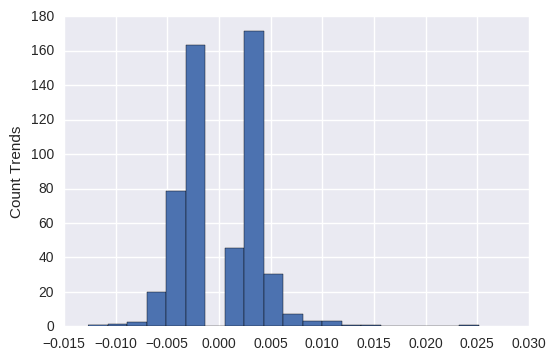

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(trend_results['Max Trend Size'], normed=True, bins=20)
plt.ylabel('Count Trends');

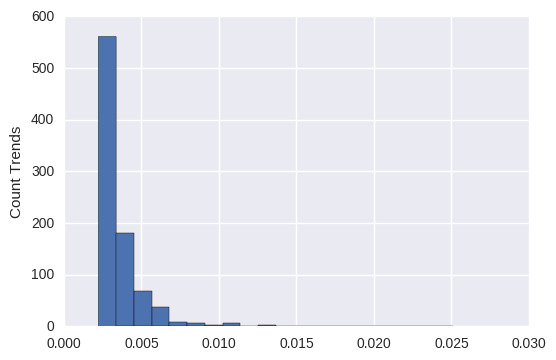

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(trend_results['Abs Max Trend Sz'], normed=True, bins=20)
plt.ylabel('Count Trends');

In [13]:
ds3 = ws.datasets['MXN Variable Tick Data.csv']
df3 = ds3.to_dataframe()
TickData = pd.DataFrame(data = df3)

TickData = TickData.fillna(method='ffill')
TickData['Dates'] = pd.to_datetime(TickData['Dates'])

TickData['Day Start'] = np.where(TickData['Dates'].dt.minute == 0, np.where(TickData['Dates'].dt.hour == 0,1,""),"")

TickData['V1M Change'] = ""
TickData['V1Y Change'] = ""
TickData['DXY Change'] = ""
TickData['SPX Change'] = ""

TickData

,Dates,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change
0,2019-05-15 00:00:00,9.908,11.010,NaN,97.510,1,,,,
1,2019-05-15 00:01:00,9.908,11.010,NaN,97.513,,,,,
2,2019-05-15 00:02:00,9.908,11.010,NaN,97.514,,,,,
3,2019-05-15 00:03:00,9.908,11.010,NaN,97.512,,,,,
4,2019-05-15 00:04:00,9.908,11.010,NaN,97.512,,,,,
5,2019-05-15 00:05:00,9.908,11.010,NaN,97.516,,,,,
6,2019-05-15 00:06:00,9.908,11.010,NaN,97.517,,,,,
7,2019-05-15 00:07:00,9.933,11.005,NaN,97.519,,,,,
8,2019-05-15 00:08:00,9.933,11.005,NaN,97.521,,,,,
9,2019-05-15 00:09:00,9.933,11.005,NaN,97.525,,,,,


In [18]:
ds4 = ws.datasets['MXN Variable Tick Data New.csv']
df4 = ds4.to_dataframe()
TickDataNew = pd.DataFrame(data = df4)

TickDataNew = TickDataNew.fillna(method='ffill')
TickDataNew['Dates'] = pd.to_datetime(TickDataNew['Dates'])

TickDataNew['Day Start'] = np.where(TickDataNew['Dates'].dt.minute == 0, np.where(TickDataNew['Dates'].dt.hour == 0,1,""),"")

TickDataNew['MXEF Change'] = ""
TickDataNew['MXEF CCY Change'] = ""
TickDataNew['BBDXY Change'] = ""

TickDataNew = TickDataNew.dropna()
TickDataNew = TickDataNew.reset_index()
TickDataNew = TickDataNew.drop('index', axis=1)
TickDataNew

,Dates,MXEF Tick,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,Day Start,MXEF Change,MXEF CCY Change,BBDXY Change
0,2019-05-19 20:00:00,996.34,1610.62,1207.98,20.947351,-0.000495,-0.001567,-0.031851,,,,
1,2019-05-19 20:01:00,996.99,1610.88,1207.95,20.947351,-0.000495,-0.001567,-0.031851,,,,
2,2019-05-19 20:02:00,997.05,1610.95,1207.99,20.947351,-0.000495,-0.001567,-0.031851,,,,
3,2019-05-19 20:03:00,997.09,1610.99,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,,,
4,2019-05-19 20:04:00,997.08,1611.00,1208.11,20.947351,-0.000495,-0.001567,-0.031851,,,,
5,2019-05-19 20:05:00,997.16,1611.01,1208.06,20.947351,-0.000495,-0.001567,-0.031851,,,,
6,2019-05-19 20:06:00,997.12,1611.00,1208.14,20.947351,-0.000495,-0.001567,-0.031851,,,,
7,2019-05-19 20:07:00,996.80,1610.92,1208.10,20.947351,-0.000495,-0.001567,-0.031851,,,,
8,2019-05-19 20:08:00,996.98,1610.96,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,,,
9,2019-05-19 20:09:00,996.94,1610.98,1208.19,20.947351,-0.000495,-0.001567,-0.031851,,,,


In [19]:
TickDataNew.loc[0,'Day Start'] = 1
TickDataNew

,Dates,MXEF Tick,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,Day Start,MXEF Change,MXEF CCY Change,BBDXY Change
0,2019-05-19 20:00:00,996.34,1610.62,1207.98,20.947351,-0.000495,-0.001567,-0.031851,1,,,
1,2019-05-19 20:01:00,996.99,1610.88,1207.95,20.947351,-0.000495,-0.001567,-0.031851,,,,
2,2019-05-19 20:02:00,997.05,1610.95,1207.99,20.947351,-0.000495,-0.001567,-0.031851,,,,
3,2019-05-19 20:03:00,997.09,1610.99,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,,,
4,2019-05-19 20:04:00,997.08,1611.00,1208.11,20.947351,-0.000495,-0.001567,-0.031851,,,,
5,2019-05-19 20:05:00,997.16,1611.01,1208.06,20.947351,-0.000495,-0.001567,-0.031851,,,,
6,2019-05-19 20:06:00,997.12,1611.00,1208.14,20.947351,-0.000495,-0.001567,-0.031851,,,,
7,2019-05-19 20:07:00,996.80,1610.92,1208.10,20.947351,-0.000495,-0.001567,-0.031851,,,,
8,2019-05-19 20:08:00,996.98,1610.96,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,,,
9,2019-05-19 20:09:00,996.94,1610.98,1208.19,20.947351,-0.000495,-0.001567,-0.031851,,,,


In [20]:
for i in range(len(TickDataNew)):
    if (TickDataNew.loc[i,'Day Start'] != ""):
        TickDataNew.loc[i,'MXEF Change'] = 0
        TickDataNew.loc[i,'MXEF CCY Change'] = 0
        TickDataNew.loc[i,'BBDXY Change'] = 0
        start_val_MXEF = TickDataNew.loc[i,'MXEF Tick']
        start_val_MXCCY = TickDataNew.loc[i,'MXEF CCY Tick']
        start_val_BBDXY = TickDataNew.loc[i,'BBDXY Tick']
    else:
        TickDataNew.loc[i,'MXEF Change'] = (TickDataNew.loc[i,'MXEF Tick'] - start_val_MXEF)
        TickDataNew.loc[i,'MXEF CCY Change'] = (TickDataNew.loc[i,'MXEF CCY Tick'] - start_val_MXCCY)
        TickDataNew.loc[i,'BBDXY Change'] = (TickDataNew.loc[i,'BBDXY Tick'] - start_val_BBDXY)
TickDataNew

,Dates,MXEF Tick,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,Day Start,MXEF Change,MXEF CCY Change,BBDXY Change
0,2019-05-19 20:00:00,996.34,1610.62,1207.98,20.947351,-0.000495,-0.001567,-0.031851,1,0,0,0
1,2019-05-19 20:01:00,996.99,1610.88,1207.95,20.947351,-0.000495,-0.001567,-0.031851,,0.65,0.26,-0.03
2,2019-05-19 20:02:00,997.05,1610.95,1207.99,20.947351,-0.000495,-0.001567,-0.031851,,0.71,0.33,0.01
3,2019-05-19 20:03:00,997.09,1610.99,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,0.75,0.37,0.15
4,2019-05-19 20:04:00,997.08,1611.00,1208.11,20.947351,-0.000495,-0.001567,-0.031851,,0.74,0.38,0.13
5,2019-05-19 20:05:00,997.16,1611.01,1208.06,20.947351,-0.000495,-0.001567,-0.031851,,0.82,0.39,0.08
6,2019-05-19 20:06:00,997.12,1611.00,1208.14,20.947351,-0.000495,-0.001567,-0.031851,,0.78,0.38,0.16
7,2019-05-19 20:07:00,996.80,1610.92,1208.10,20.947351,-0.000495,-0.001567,-0.031851,,0.46,0.3,0.12
8,2019-05-19 20:08:00,996.98,1610.96,1208.13,20.947351,-0.000495,-0.001567,-0.031851,,0.64,0.34,0.15
9,2019-05-19 20:09:00,996.94,1610.98,1208.19,20.947351,-0.000495,-0.001567,-0.031851,,0.6,0.36,0.21


In [32]:
ds5 = ws.datasets['USDMXN Input Data.csv']
df5 = ds5.to_dataframe()
new_trends = pd.DataFrame(data = df5)

In [35]:
new_trends.shape

(685, 20)

In [33]:
new_ticks = new_trends.set_index('Trend Start Time').join(TickDataNew.set_index('Dates'))

new_ticks

,1M Vol Open,1Y Vol Open,DXY Open,Daily Trend #,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,Trend Start,Trend Type,...,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,Day Start,MXEF Change,MXEF CCY Change,BBDXY Change
2019-05-15 07:55:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19.1674,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-15 10:13:00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,19.2146,Down,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-15 11:24:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,19.1698,Down,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 04:23:00,9.480,10.913,97.543,1.0,-0.06,1.1250,0.7945,-0.99,19.0714,Down,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 07:41:00,9.480,10.913,97.543,2.0,-0.06,1.1250,0.7945,-0.99,18.9787,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 08:49:00,9.480,10.913,97.543,3.0,-0.06,1.1250,0.7945,-0.99,19.0247,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 10:11:00,9.480,10.913,97.543,4.0,-0.06,1.1250,0.7945,-0.99,19.0693,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 10:38:00,9.480,10.913,97.543,5.0,-0.06,1.1250,0.7945,-0.99,19.1341,Down,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-16 15:39:00,9.480,10.913,97.543,6.0,-0.06,1.1250,0.7945,-0.99,19.0675,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-17 06:37:00,9.350,11.070,97.832,1.0,0.50,1.0175,0.8383,0.20,19.1318,Up,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
new_ticks = new_ticks.reset_index()

In [40]:
new_ticks = new_ticks.rename(columns={"index": "Trend Start Time"})
new_ticks

,Trend Start Time,1M Vol Open,1Y Vol Open,DXY Open,Daily Trend #,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,Trend Start,...,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,Day Start,MXEF Change,MXEF CCY Change,BBDXY Change
0,2019-05-15 07:55:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19.1674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-15 10:13:00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,19.2146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-15 11:24:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,19.1698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-16 04:23:00,9.480,10.913,97.543,1.0,-0.06,1.1250,0.7945,-0.99,19.0714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-16 07:41:00,9.480,10.913,97.543,2.0,-0.06,1.1250,0.7945,-0.99,18.9787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-05-16 08:49:00,9.480,10.913,97.543,3.0,-0.06,1.1250,0.7945,-0.99,19.0247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-05-16 10:11:00,9.480,10.913,97.543,4.0,-0.06,1.1250,0.7945,-0.99,19.0693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-05-16 10:38:00,9.480,10.913,97.543,5.0,-0.06,1.1250,0.7945,-0.99,19.1341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-05-16 15:39:00,9.480,10.913,97.543,6.0,-0.06,1.1250,0.7945,-0.99,19.0675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-05-17 06:37:00,9.350,11.070,97.832,1.0,0.50,1.0175,0.8383,0.20,19.1318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
from azureml import DataTypeIds
dataset2 = ws.datasets['USDMXN Input Data.csv']

dataset2.update_from_dataframe(
    dataframe= new_ticks,
    data_type_id=DataTypeIds.GenericCSV,
)

In [14]:
TickData['SPX Change'] = ""
TickData

,Dates,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change
0,2019-05-15 00:00:00,9.908,11.010,NaN,97.510,1,,,,
1,2019-05-15 00:01:00,9.908,11.010,NaN,97.513,,,,,
2,2019-05-15 00:02:00,9.908,11.010,NaN,97.514,,,,,
3,2019-05-15 00:03:00,9.908,11.010,NaN,97.512,,,,,
4,2019-05-15 00:04:00,9.908,11.010,NaN,97.512,,,,,
5,2019-05-15 00:05:00,9.908,11.010,NaN,97.516,,,,,
6,2019-05-15 00:06:00,9.908,11.010,NaN,97.517,,,,,
7,2019-05-15 00:07:00,9.933,11.005,NaN,97.519,,,,,
8,2019-05-15 00:08:00,9.933,11.005,NaN,97.521,,,,,
9,2019-05-15 00:09:00,9.933,11.005,NaN,97.525,,,,,


In [15]:
for i in range(len(TickData)):
    if (TickData.loc[i,'Day Start'] != ""):
        TickData.loc[i,'V1M Change'] = 0
        TickData.loc[i,'V1Y Change'] = 0
        TickData.loc[i,'DXY Change'] = 0
        start_val_1M = TickData.loc[i,'USDMXNV1M Tick']
        start_val_1Y = TickData.loc[i,'USDMXNV1Y Tick']
        start_val_DXY = TickData.loc[i,'DXY Tick']
    else:
        TickData.loc[i,'V1M Change'] = (TickData.loc[i,'USDMXNV1M Tick'] - start_val_1M)
        TickData.loc[i,'V1Y Change'] = (TickData.loc[i,'USDMXNV1Y Tick'] - start_val_1Y)
        TickData.loc[i,'DXY Change'] = (TickData.loc[i,'DXY Tick'] - start_val_DXY)
TickData

,Dates,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change
0,2019-05-15 00:00:00,9.908,11.010,NaN,97.510,1,0,0,0,
1,2019-05-15 00:01:00,9.908,11.010,NaN,97.513,,0,0,0.003,
2,2019-05-15 00:02:00,9.908,11.010,NaN,97.514,,0,0,0.004,
3,2019-05-15 00:03:00,9.908,11.010,NaN,97.512,,0,0,0.002,
4,2019-05-15 00:04:00,9.908,11.010,NaN,97.512,,0,0,0.002,
5,2019-05-15 00:05:00,9.908,11.010,NaN,97.516,,0,0,0.006,
6,2019-05-15 00:06:00,9.908,11.010,NaN,97.517,,0,0,0.007,
7,2019-05-15 00:07:00,9.933,11.005,NaN,97.519,,0.025,-0.005,0.009,
8,2019-05-15 00:08:00,9.933,11.005,NaN,97.521,,0.025,-0.005,0.011,
9,2019-05-15 00:09:00,9.933,11.005,NaN,97.525,,0.025,-0.005,0.015,


In [16]:
TickData['SPX Day Start'] = np.where(TickData['Dates'].dt.minute == 30, np.where(TickData['Dates'].dt.hour == 9,1,""),"")
start_val_SPX = 0
for i in range(len(TickData)):
    if (TickData.loc[i,'SPX Day Start'] != ""):
        TickData.loc[i,'SPX Change'] = 0
        start_val_SPX = TickData.loc[i,'SPX Tick']
    else:
        TickData.loc[i,'SPX Change'] = (TickData.loc[i,'SPX Tick'] - start_val_SPX)

TickData

,Dates,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change,SPX Day Start
0,2019-05-15 00:00:00,9.908,11.010,NaN,97.510,1,0,0,0,NaN,
1,2019-05-15 00:01:00,9.908,11.010,NaN,97.513,,0,0,0.003,NaN,
2,2019-05-15 00:02:00,9.908,11.010,NaN,97.514,,0,0,0.004,NaN,
3,2019-05-15 00:03:00,9.908,11.010,NaN,97.512,,0,0,0.002,NaN,
4,2019-05-15 00:04:00,9.908,11.010,NaN,97.512,,0,0,0.002,NaN,
5,2019-05-15 00:05:00,9.908,11.010,NaN,97.516,,0,0,0.006,NaN,
6,2019-05-15 00:06:00,9.908,11.010,NaN,97.517,,0,0,0.007,NaN,
7,2019-05-15 00:07:00,9.933,11.005,NaN,97.519,,0.025,-0.005,0.009,NaN,
8,2019-05-15 00:08:00,9.933,11.005,NaN,97.521,,0.025,-0.005,0.011,NaN,
9,2019-05-15 00:09:00,9.933,11.005,NaN,97.525,,0.025,-0.005,0.015,NaN,


In [17]:
check = TickData[TickData['SPX Tick'].notnull()]
#check = check[check['SPX Change'] != 0]

check

,Dates,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change,SPX Day Start
570,2019-05-15 09:30:00,9.863,11.015,2816.81,97.649,,-0.045,0.005,0.139,0,1
571,2019-05-15 09:31:00,9.863,11.015,2817.79,97.651,,-0.045,0.005,0.141,0.98,
572,2019-05-15 09:32:00,9.863,11.010,2815.12,97.655,,-0.045,0,0.145,-1.69,
573,2019-05-15 09:33:00,9.860,11.020,2816.19,97.653,,-0.048,0.01,0.143,-0.62,
574,2019-05-15 09:34:00,9.860,11.020,2819.13,97.642,,-0.048,0.01,0.132,2.32,
575,2019-05-15 09:35:00,9.860,11.020,2819.05,97.636,,-0.048,0.01,0.126,2.24,
576,2019-05-15 09:36:00,9.860,11.020,2820.64,97.650,,-0.048,0.01,0.14,3.83,
577,2019-05-15 09:37:00,9.860,11.020,2822.35,97.653,,-0.048,0.01,0.143,5.54,
578,2019-05-15 09:38:00,9.860,11.015,2821.86,97.652,,-0.048,0.005,0.142,5.05,
579,2019-05-15 09:39:00,9.860,11.015,2821.85,97.645,,-0.048,0.005,0.135,5.04,


In [23]:
#Joining trend data and tick data
trends_ticks = trend_results.set_index('Trend Start Time').join(TickData.set_index('Dates'))

#Set to avg trend size for CCY trends
avg_trend = .0034

#Defines target we want to predict as being 1 if above avg trend, 0 if below
trends_ticks['Target'] = np.where(trends_ticks['Abs Max Trend Sz'] > avg_trend,1,0)
results = trends_ticks.reset_index()
results = results.rename(columns={"index": "Trend Start Time"})
results

,Trend Start Time,1M Vol Open,1Y Vol Open,CCY,DXY Open,Daily Trend #,Max Trend Size,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,...,USDMXNV1Y Tick,SPX Tick,DXY Tick,Day Start,V1M Change,V1Y Change,DXY Change,SPX Change,SPX Day Start,Target
0,2019-05-15 07:55:00,NaN,NaN,USDMXN,NaN,1.0,0.002463,NaN,NaN,NaN,...,10.995,NaN,97.657,,-0.036,-0.015,0.147,NaN,,0
1,2019-05-15 10:13:00,NaN,NaN,USDMXN,NaN,2.0,-0.002332,NaN,NaN,NaN,...,11.025,2827.89,97.504,,-0.018,0.015,-0.006,11.08,,0
2,2019-05-15 11:24:00,NaN,NaN,USDMXN,NaN,3.0,-0.008153,NaN,NaN,NaN,...,10.995,2846.06,97.562,,-0.208,-0.015,0.052,29.25,,1
3,2019-05-16 04:23:00,9.480,10.913,USDMXN,97.543,1.0,-0.004861,-0.06,1.1250,0.7945,...,10.923,2850.96,97.510,,0.005,-0.012,-0.022,34.15,,1
4,2019-05-16 07:41:00,9.480,10.913,USDMXN,97.543,2.0,0.002424,-0.06,1.1250,0.7945,...,10.900,2850.96,97.605,,-0.09,-0.035,0.073,34.15,,0
5,2019-05-16 08:49:00,9.480,10.913,USDMXN,97.543,3.0,0.002344,-0.06,1.1250,0.7945,...,10.930,2850.96,97.685,,-0.058,-0.005,0.153,34.15,,0
6,2019-05-16 10:11:00,9.480,10.913,USDMXN,97.543,4.0,0.003398,-0.06,1.1250,0.7945,...,11.000,2876.98,97.748,,-0.003,0.065,0.216,18.22,,0
7,2019-05-16 10:38:00,9.480,10.913,USDMXN,97.543,5.0,-0.003481,-0.06,1.1250,0.7945,...,11.065,2883.03,97.744,,-0.003,0.13,0.212,24.27,,1
8,2019-05-16 15:39:00,9.480,10.913,USDMXN,97.543,6.0,0.003131,-0.06,1.1250,0.7945,...,11.065,2875.29,97.847,,-0.178,0.13,0.315,16.53,,0
9,2019-05-17 06:37:00,9.350,11.070,USDMXN,97.832,1.0,0.004521,0.50,1.0175,0.8383,...,11.090,2876.32,97.889,,-0.065,-0.003,0.078,17.56,,1


In [24]:
results_data = results.drop(['CCY', 'Max Trend Size', 'SPX Open', 'Trend End Time', 'Trend Extreme', 'Abs Max Trend Sz', 'Day Start',
                                         'SPX Day Start'], axis=1)
results_data

,Trend Start Time,1M Vol Open,1Y Vol Open,DXY Open,Daily Trend #,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,Trend Start,Trend Type,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,V1M Change,V1Y Change,DXY Change,SPX Change,Target
0,2019-05-15 07:55:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19.1674,Up,9.872,10.995,NaN,97.657,-0.036,-0.015,0.147,NaN,0
1,2019-05-15 10:13:00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,19.2146,Down,9.890,11.025,2827.89,97.504,-0.018,0.015,-0.006,11.08,0
2,2019-05-15 11:24:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,19.1698,Down,9.700,10.995,2846.06,97.562,-0.208,-0.015,0.052,29.25,1
3,2019-05-16 04:23:00,9.480,10.913,97.543,1.0,-0.06,1.1250,0.7945,-0.99,19.0714,Down,9.478,10.923,2850.96,97.510,0.005,-0.012,-0.022,34.15,1
4,2019-05-16 07:41:00,9.480,10.913,97.543,2.0,-0.06,1.1250,0.7945,-0.99,18.9787,Up,9.383,10.900,2850.96,97.605,-0.09,-0.035,0.073,34.15,0
5,2019-05-16 08:49:00,9.480,10.913,97.543,3.0,-0.06,1.1250,0.7945,-0.99,19.0247,Up,9.415,10.930,2850.96,97.685,-0.058,-0.005,0.153,34.15,0
6,2019-05-16 10:11:00,9.480,10.913,97.543,4.0,-0.06,1.1250,0.7945,-0.99,19.0693,Up,9.470,11.000,2876.98,97.748,-0.003,0.065,0.216,18.22,0
7,2019-05-16 10:38:00,9.480,10.913,97.543,5.0,-0.06,1.1250,0.7945,-0.99,19.1341,Down,9.470,11.065,2883.03,97.744,-0.003,0.13,0.212,24.27,1
8,2019-05-16 15:39:00,9.480,10.913,97.543,6.0,-0.06,1.1250,0.7945,-0.99,19.0675,Up,9.295,11.065,2875.29,97.847,-0.178,0.13,0.315,16.53,0
9,2019-05-17 06:37:00,9.350,11.070,97.832,1.0,0.50,1.0175,0.8383,0.20,19.1318,Up,9.390,11.090,2876.32,97.889,-0.065,-0.003,0.078,17.56,1


In [25]:
from azureml import DataTypeIds

dataset = ws.datasets['USDMXN Trends.csv']

dataset.update_from_dataframe(
    dataframe= trends_ticks,
    data_type_id=DataTypeIds.GenericCSV,
)

dataset2 = ws.datasets['USDMXN Input Data.csv']

dataset2.update_from_dataframe(
    dataframe= results_data,
    data_type_id=DataTypeIds.GenericCSV,
)

In [26]:
results_data

,Trend Start Time,1M Vol Open,1Y Vol Open,DXY Open,Daily Trend #,Previous Day DXY Trend,Previous Day RR,Previous Day RR MAVG,Previous Day SPY Trend,Trend Start,Trend Type,USDMXNV1M Tick,USDMXNV1Y Tick,SPX Tick,DXY Tick,V1M Change,V1Y Change,DXY Change,SPX Change,Target
0,2019-05-15 07:55:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19.1674,Up,9.872,10.995,NaN,97.657,-0.036,-0.015,0.147,NaN,0
1,2019-05-15 10:13:00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,19.2146,Down,9.890,11.025,2827.89,97.504,-0.018,0.015,-0.006,11.08,0
2,2019-05-15 11:24:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,19.1698,Down,9.700,10.995,2846.06,97.562,-0.208,-0.015,0.052,29.25,1
3,2019-05-16 04:23:00,9.480,10.913,97.543,1.0,-0.06,1.1250,0.7945,-0.99,19.0714,Down,9.478,10.923,2850.96,97.510,0.005,-0.012,-0.022,34.15,1
4,2019-05-16 07:41:00,9.480,10.913,97.543,2.0,-0.06,1.1250,0.7945,-0.99,18.9787,Up,9.383,10.900,2850.96,97.605,-0.09,-0.035,0.073,34.15,0
5,2019-05-16 08:49:00,9.480,10.913,97.543,3.0,-0.06,1.1250,0.7945,-0.99,19.0247,Up,9.415,10.930,2850.96,97.685,-0.058,-0.005,0.153,34.15,0
6,2019-05-16 10:11:00,9.480,10.913,97.543,4.0,-0.06,1.1250,0.7945,-0.99,19.0693,Up,9.470,11.000,2876.98,97.748,-0.003,0.065,0.216,18.22,0
7,2019-05-16 10:38:00,9.480,10.913,97.543,5.0,-0.06,1.1250,0.7945,-0.99,19.1341,Down,9.470,11.065,2883.03,97.744,-0.003,0.13,0.212,24.27,1
8,2019-05-16 15:39:00,9.480,10.913,97.543,6.0,-0.06,1.1250,0.7945,-0.99,19.0675,Up,9.295,11.065,2875.29,97.847,-0.178,0.13,0.315,16.53,0
9,2019-05-17 06:37:00,9.350,11.070,97.832,1.0,0.50,1.0175,0.8383,0.20,19.1318,Up,9.390,11.090,2876.32,97.889,-0.065,-0.003,0.078,17.56,1
